In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Unir los datasets de precios 
precios_2021 = pd.read_csv('./Data/Precios_2021.csv')
precios_2022 = pd.read_csv('./Data/Precios_2022.csv')
precios_2023 = pd.read_csv('./Data/Precios_2023.csv')
importaciones = pd.read_csv('./Data/importacion.csv')

precios = pd.concat([precios_2021, precios_2022, precios_2023])
precios.drop(["Bunker", "Tipo de Cambio"], axis=1, inplace=True)

dt_cuan = ['Superior', 'Regular', 'Diesel', 'Glp Cilindro 25Lbs. GTQ/CIL 25 LB', 'Glp Cilindro 25Lbs. GTQ/LB' ]
precios.dropna(inplace=True)
precios_numerics = precios[dt_cuan]




## Analisis Exploratorio de Datos

### Precios

1. Haga un análisis exploratorio de los datos que se le presentan (recuerde utilizar solo las
columnas de gasolinas regular, super, diesel y gas licuado de todos los conjuntos), se sugiere
explorar el comportamiento de las variables y si están distribuidas normalmente, en caso
de ser continuas. Meses en los que más importaciones hay, picos en importaciones por año
por tipo de combustibles, comportamiento en los últimos x años, comportamiento durante
la pandemia, etc.

In [3]:
##Precios
precios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 217
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FECHA                              948 non-null    object 
 1   Superior                           948 non-null    float64
 2   Regular                            948 non-null    float64
 3   Diesel                             948 non-null    float64
 4   Glp Cilindro 25Lbs. GTQ/CIL 25 LB  948 non-null    float64
 5   Glp Cilindro 25Lbs. GTQ/LB         948 non-null    float64
dtypes: float64(5), object(1)
memory usage: 51.8+ KB


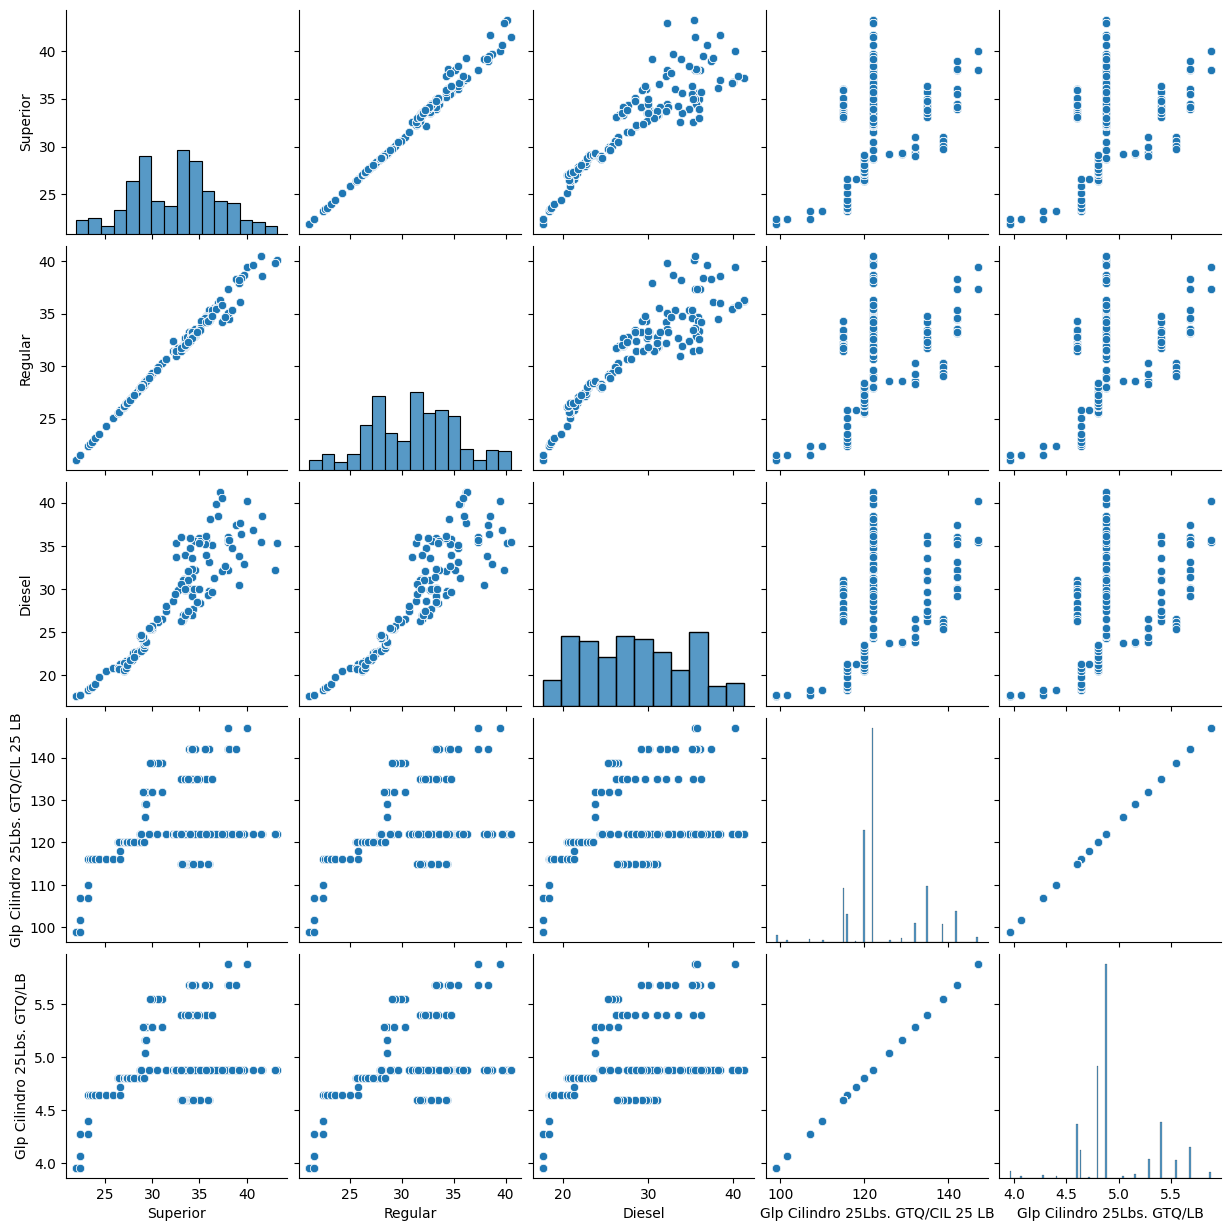

In [4]:
precios.reset_index(drop = True, inplace = True)
sns.pairplot(precios[dt_cuan])
plt.show()

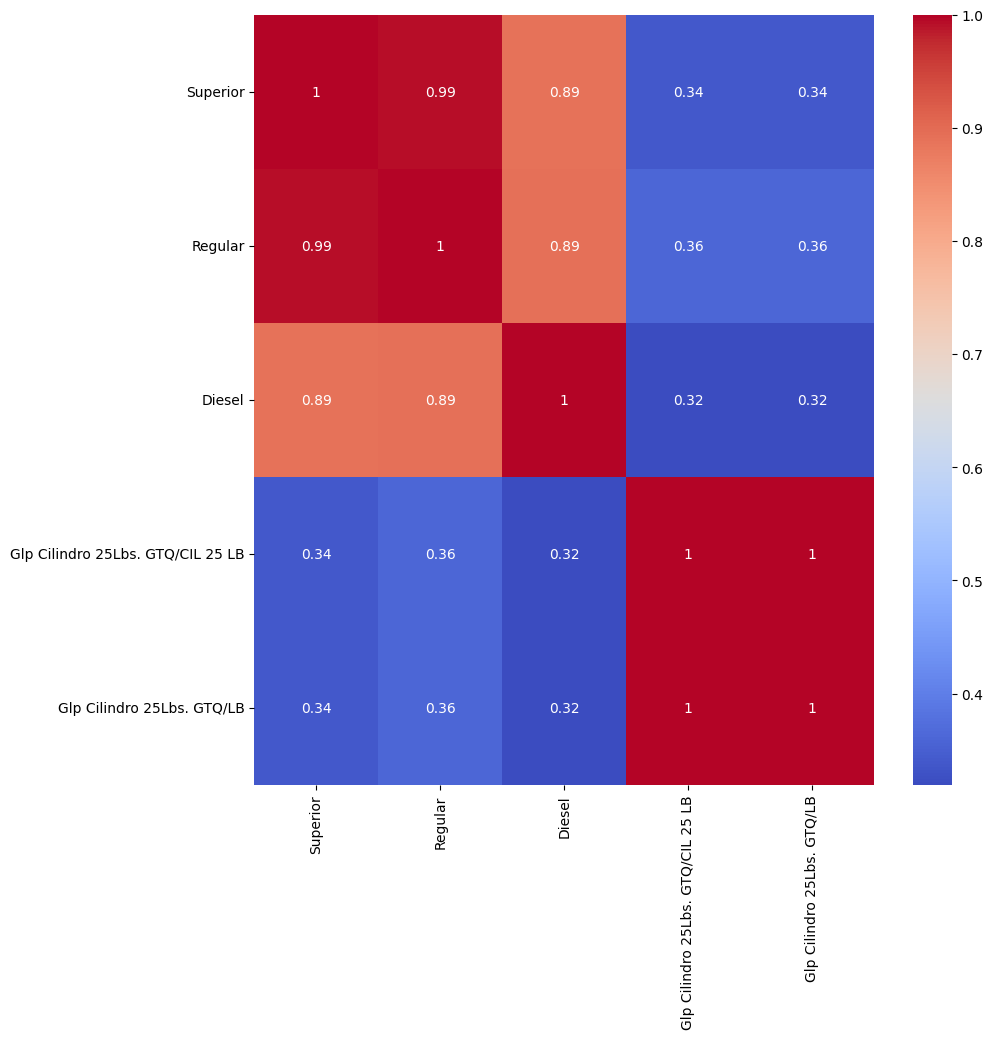

In [39]:
correlation_matrix = precios_numerics.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Al observar los histogramas realizados es posible observar que ninguna variable sigue una distribucion normal. Por otro lado en cuanto a los digramas de dispersion se puede observar que hay variables que tienen un correlación muy fuerte. Por ejemplo las variables gasolina regular y gasolina superior presentan valor de correlación de 0.99 y la variable de diesel presenta un valor de 0.89 con las dos variables mencionadas anteriormente

In [5]:
nans_por_columna = precios.isna().sum()
print(nans_por_columna)

FECHA                                0
Superior                             0
Regular                              0
Diesel                               0
Glp Cilindro 25Lbs. GTQ/CIL 25 LB    0
Glp Cilindro 25Lbs. GTQ/LB           0
dtype: int64


In [6]:
normality_precios = precios_numerics.apply(normaltest)
print(normality_precios)

    Superior   Regular        Diesel  Glp Cilindro 25Lbs. GTQ/CIL 25 LB  \
0  13.693900  8.744152  1.781288e+02                       6.549501e+01   
1   0.001063  0.012625  2.088471e-39                       5.997065e-15   

   Glp Cilindro 25Lbs. GTQ/LB  
0                6.565420e+01  
1                5.538240e-15  


En el dataset de precios las variables de interes no parecen seguir una distribución normal debido al valor bajo de p.

In [ ]:
# Agregar graficas

### Importacion

In [7]:
importaciones.columns
importaciones_cuant = ["Gas licuado de petróleo","Gasolina regular","Gasolina superior","Diesel alto azufre","Total importación"]

C:\Users\archi\AppData\Local\Temp\ipykernel_3560\601476399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import_df[column] = import_df[column].apply(limpiar_y_convertir_a_float)


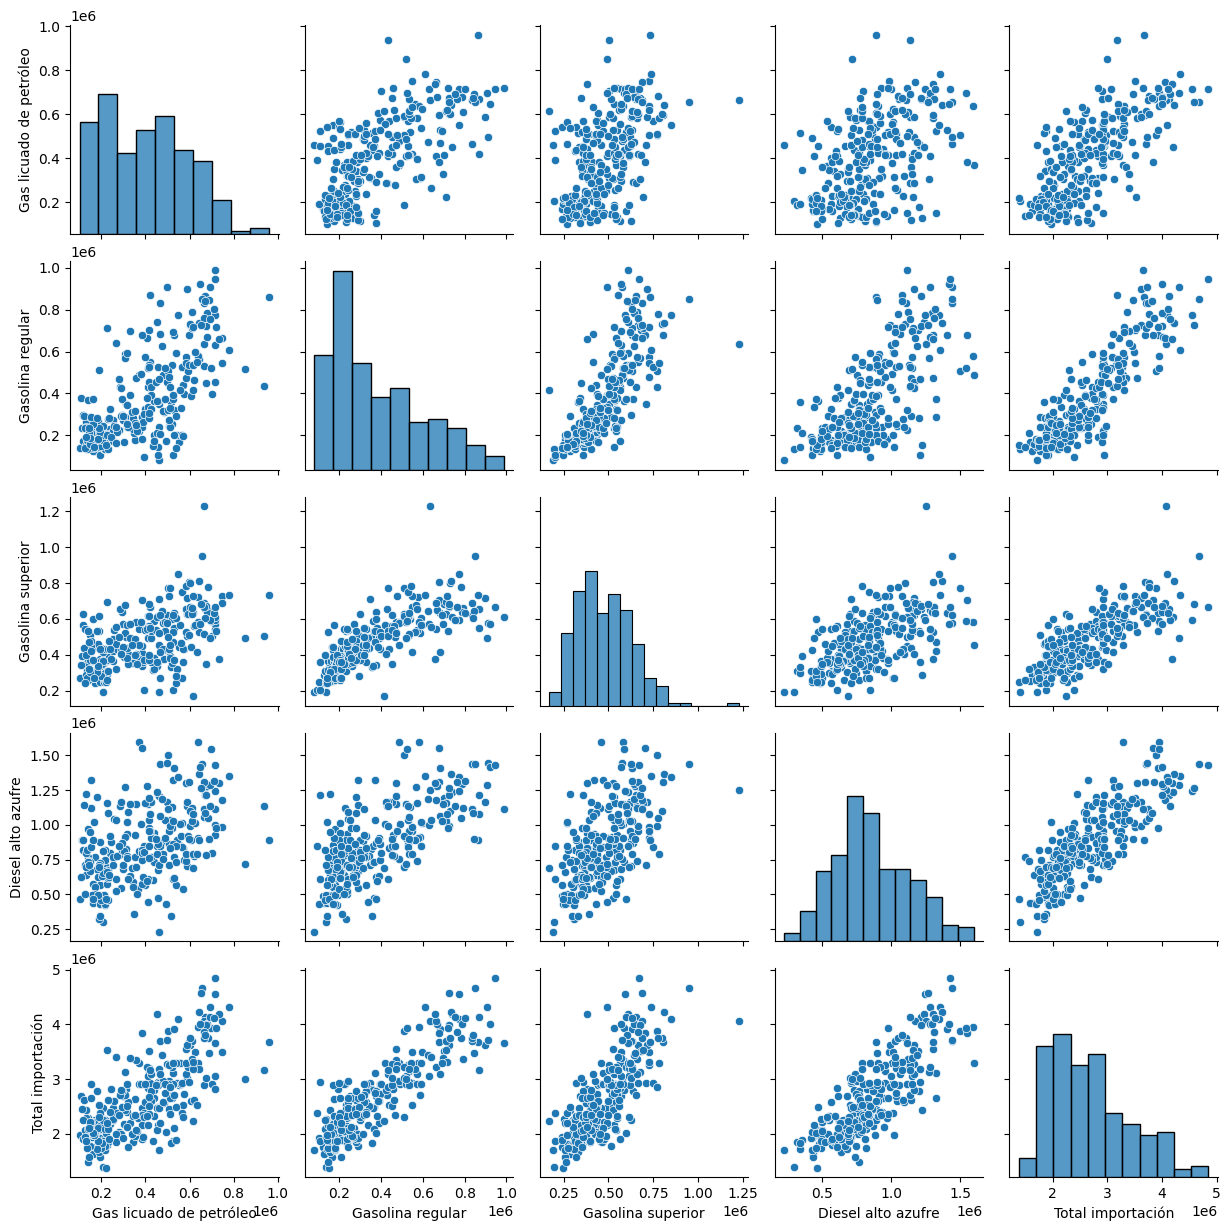

In [8]:
def limpiar_y_convertir_a_float(valor_str):
    return float(valor_str.replace(',', ''))

import_df = importaciones[importaciones_cuant]
#import_df.head()
#import_df.info()
for column in import_df.columns:
    import_df[column] = import_df[column].apply(limpiar_y_convertir_a_float)

sns.pairplot(import_df)
plt.show()

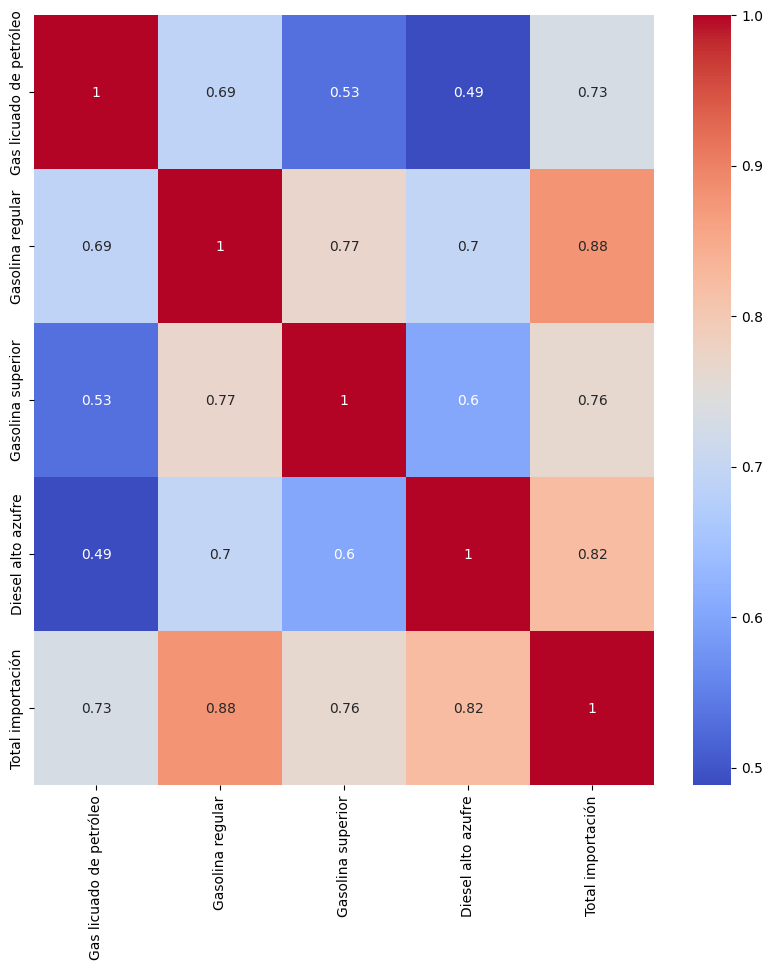

In [40]:
correlation_matrix = import_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Al observar los diagramas de dispersion y la matriz de correlación es posible observar que las variables de interes cuentan con una fuerte correlación entre sí, con valores de 0.5 hacia arriba. En cuanto a a si los datos siguen una distrución normal será necesario hacer un test de normalidad, ya que los histogramas no son suficientes para determinar si los datos siguen una distribución normal.

In [9]:
# Meses en los que más importaciones hay
for column in importaciones.columns:
    if column == 'Fecha':
       importaciones['Fecha'] = importaciones['Fecha'].replace({'ene-': 'Jan-','feb-': 'Feb-','mar-': 'Mar-','abr-': 'Apr-','may-': 'May-','jun-': 'Jun-','jul-': 'Jul-','ago-': 'Aug-','sep-': 'Sep-','oct-': 'Oct-','nov-': 'Nov-','dic-': 'Dec-'}, regex=True)
       importaciones['Fecha'] = pd.to_datetime(importaciones['Fecha'], format='%b-%y')
    else:
        importaciones[column] = importaciones[column].apply(limpiar_y_convertir_a_float)


In [10]:
nans_por_columna = importaciones.isna().sum()
print(nans_por_columna)

Fecha                      0
Gas licuado de petróleo    0
Gasolina regular           0
Gasolina superior          0
Diesel alto azufre         0
Total importación          0
dtype: int64


In [11]:
normality_importaciones = import_df.apply(normaltest)
print(normality_importaciones)

   Gas licuado de petróleo  Gasolina regular  Gasolina superior  \
0                25.680181         26.731272          27.221501   
1                 0.000003          0.000002           0.000001   

   Diesel alto azufre  Total importación  
0            7.133463          17.722492  
1            0.028248           0.000142  


Despues de realizar el test de normalidad sobre las diferentes variables de interes se puede observar que ninguna de ellas sigue una distribucion normal, debido a los valores de p-value obtenidos. 

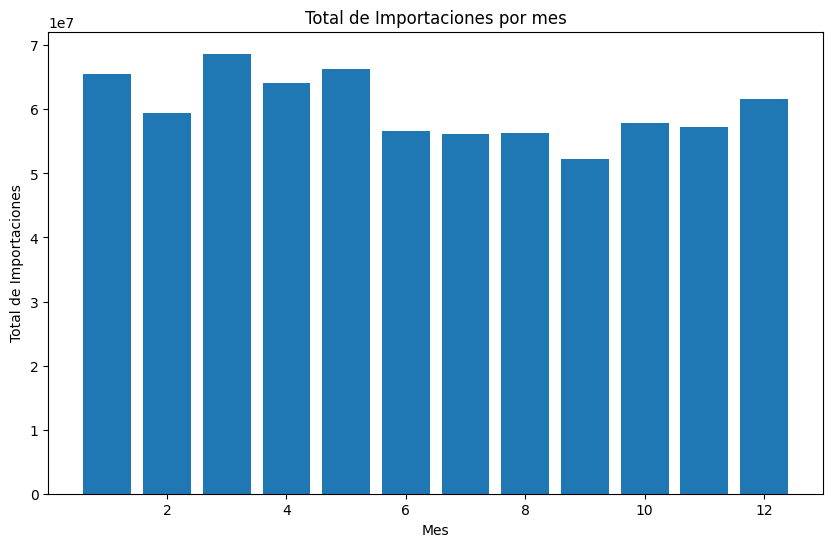

In [12]:

importaciones['Month'] = importaciones['Fecha'].dt.month

month_imports = importaciones.groupby('Month')['Total importación'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(month_imports.index, month_imports.values)
plt.title('Total de Importaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Total de Importaciones')
plt.show()


En esta gráfica se puede ver que el mes con más importaciones es el mes de marzo, seguido por el mes de enero y mayo. El mes con menos importaciones es septiembre.

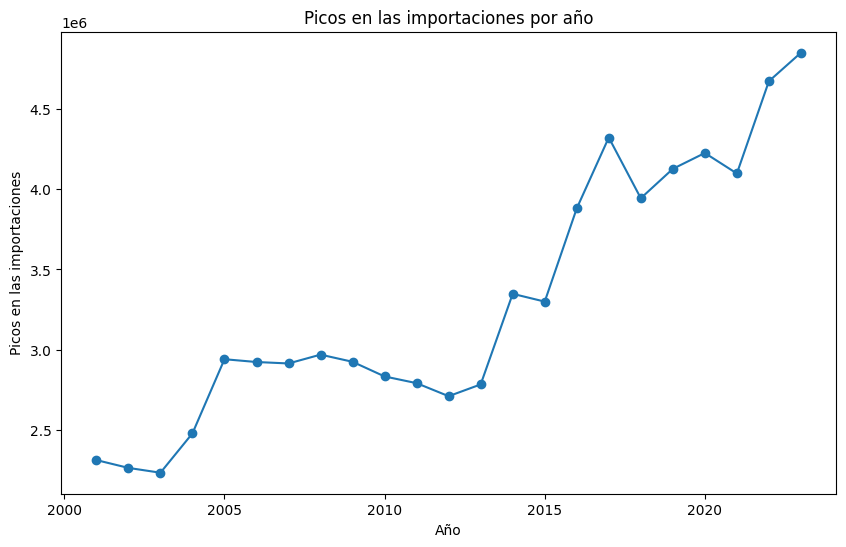

In [13]:
importaciones['Year'] = importaciones['Fecha'].dt.year
year_max_imports = importaciones.groupby('Year')['Total importación'].max()
plt.figure(figsize=(10, 6))
plt.plot(year_max_imports.index, year_max_imports.values, marker='o')
plt.title('Picos en las importaciones por año')
plt.xlabel('Año')
plt.ylabel('Picos en las importaciones')
plt.show()


En cuanto a los picos en las importaciones el más notable es en el año 2023. Esto puede ser poruqe el 2023 es cuando finalemente todos los colegios y empresas regresaron a modalidad presencial y se necesitaba más combustible para  el transporte. 

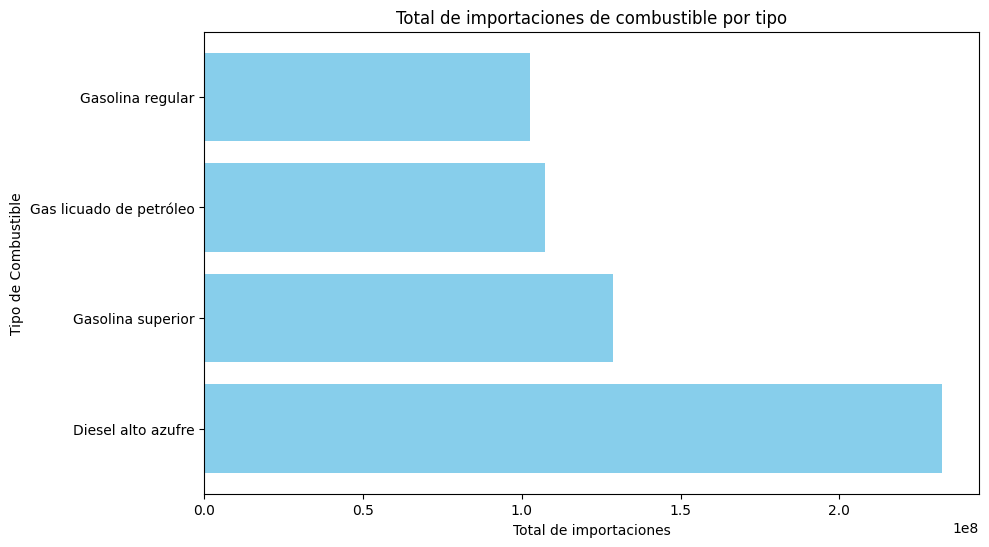

In [14]:
fuel_imports = importaciones[['Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(fuel_imports.index, fuel_imports.values, color='skyblue')
plt.title('Total de importaciones de combustible por tipo')
plt.xlabel('Total de importaciones')
plt.ylabel('Tipo de Combustible')
plt.show()

En cuanto a las al tipo de combustible más importado fue el diesel alto en azufre, mientras que la gasolina regular es la que menos se ha importado. 

### Comportamiento en los ultimos 5 años

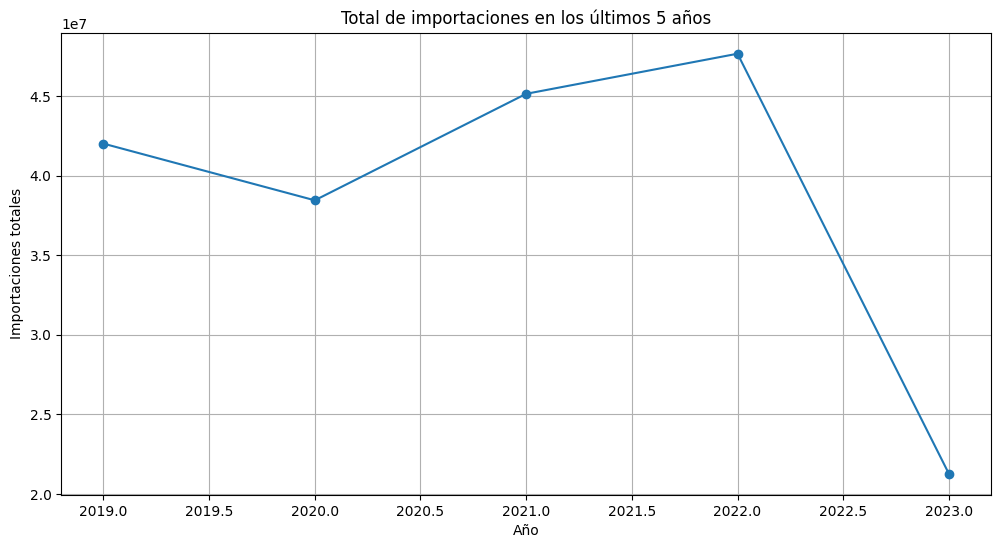

In [15]:
x = 5
recent_years_df = importaciones[importaciones['Year'] > importaciones['Year'].max() - x]
recent_years_imports = recent_years_df.groupby('Year')['Total importación'].sum()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(recent_years_imports.index, recent_years_imports.values, marker='o')
plt.title('Total de importaciones en los últimos {} años'.format(x))
plt.xlabel('Año')
plt.ylabel('Importaciones totales')
plt.grid(True)
plt.show()


Al observar la gráfica anterior se puede ver como se ha visto el total de importaciones por año. En el año 2020 se puede ver cómo el total de importaciones baja, esto puede deberse a la pandemia y que todas se vieron forzados a confinamiento. El total de importaciones vuelve a subir hasta llegar a un pico en 2022 y bajar en 2023. La caída en el 2023 se debe a que el año no se ha terminado. 

### Consumo

In [35]:
consumo = pd.read_csv('./Data/Consumo.csv')

for column in consumo.columns:
    if column == 'Fecha':
       consumo['Fecha'] = consumo['Fecha'].replace({'ene-': 'Jan-','feb-': 'Feb-','mar-': 'Mar-','abr-': 'Apr-','may-': 'May-','jun-': 'Jun-','jul-': 'Jul-','ago-': 'Aug-','sep-': 'Sep-','oct-': 'Oct-','nov-': 'Nov-','dic-': 'Dec-'}, regex=True)
       consumo['Fecha'] = pd.to_datetime(consumo['Fecha'], format='%b-%y')
    else:
        if consumo[column].dtype == 'object':
            consumo[column] = consumo[column].apply(limpiar_y_convertir_a_float)


consumo["Diesel_conjunto"] = consumo["Diesel alto azufre"] + consumo["Diesel bajo azufre"]
consumo["Diesel_conjunto"] = consumo["Diesel_conjunto"].fillna(0)
consumo["Diesel_conjunto"] = consumo["Diesel_conjunto"].astype(float)
consumo.dropna(subset=["Diesel_conjunto"], inplace=True)
nans_por_columna = consumo.isna().sum()
consumo.set_index('Fecha', inplace=True)




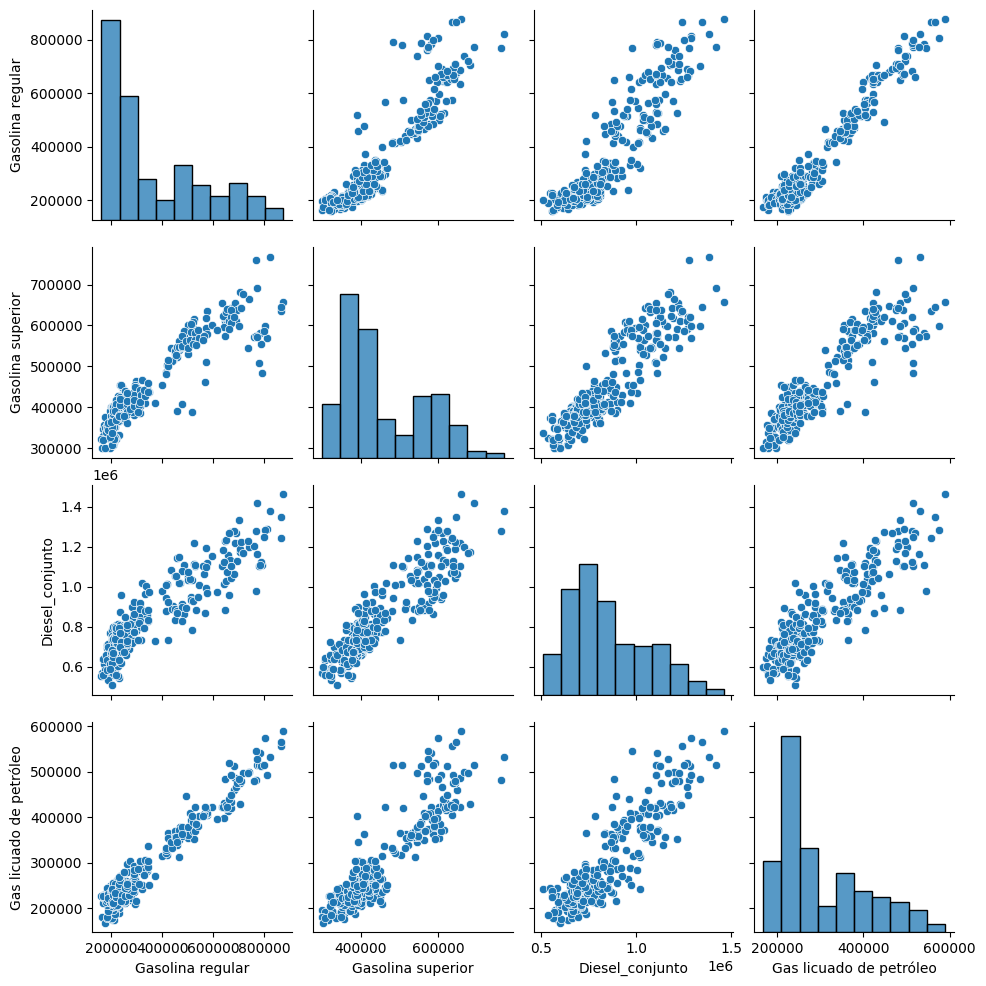

In [17]:
numerics= ["Gasolina regular", "Gasolina superior", "Diesel_conjunto", "Gas licuado de petróleo"]
consumo_numerics = consumo[numerics]

plots = sns.pairplot(consumo_numerics)
plt.show()

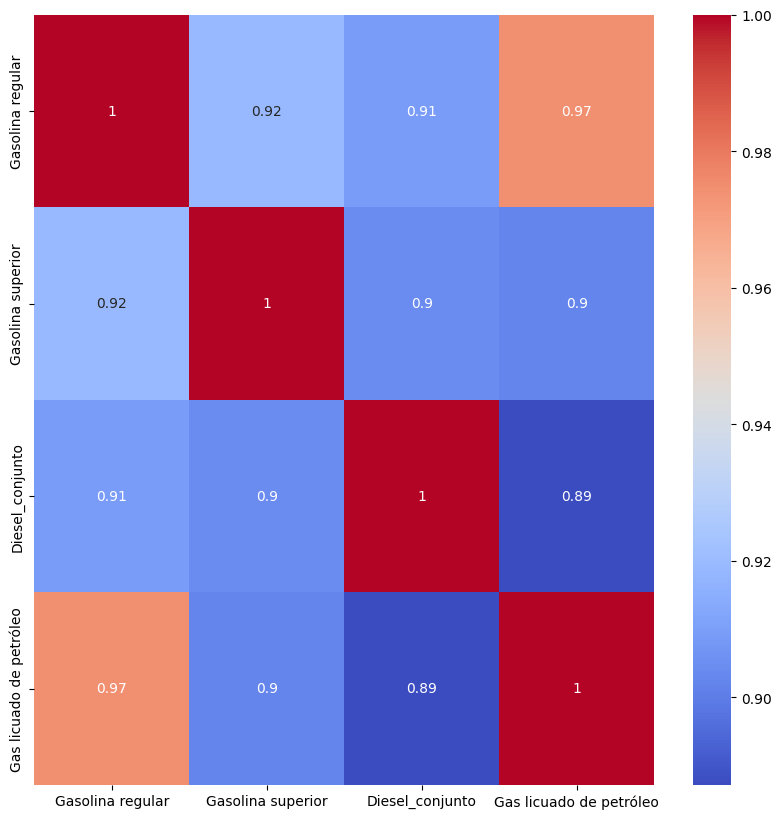

In [41]:
correlation_matrix = consumo_numerics.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

En los diagramas de dispersión realizados anteriormente se puede ver que las variables estan fuertemente relacionadas entre sí. Esto tambien es respaldado por los valores de correlación que se muestran en la matrix de correlación. Por otro lado, en los histogramas no es posible ver que las variables sigan una distribución normal, sin embargo se realizará un test de normalidad para confirmar esto.

In [18]:
normality_consumo = consumo_numerics.apply(normaltest)
print(normality_consumo)

   Gasolina regular  Gasolina superior  Diesel_conjunto  \
0      3.507221e+01       2.957783e+01        21.627472   
1      2.421952e-08       3.777945e-07         0.000020   

   Gas licuado de petróleo  
0             3.069400e+01  
1             2.162134e-07  


Despues de realizar la prueba de normalidad se puede ver que ninguna variable tiene una distribución normal debido a que el p-value es menor a 0.05, por lo tanto se puede concluir que las variables no tienen una distribución normal.

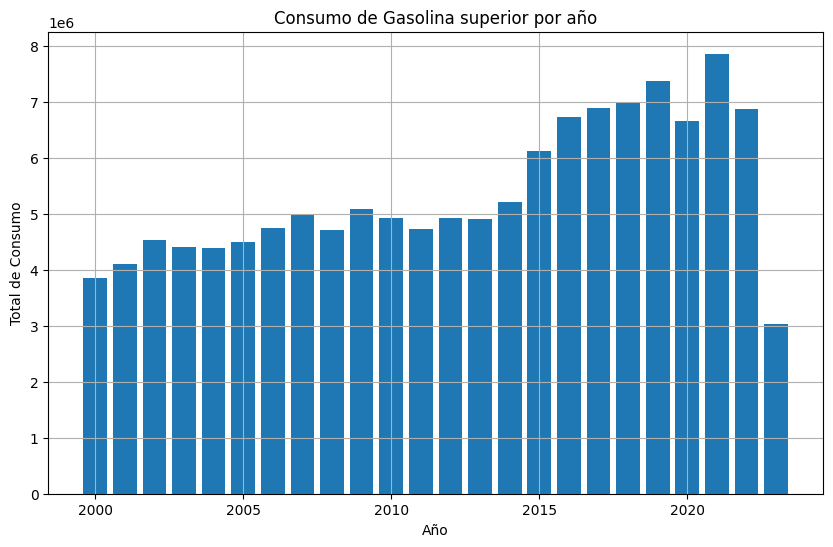

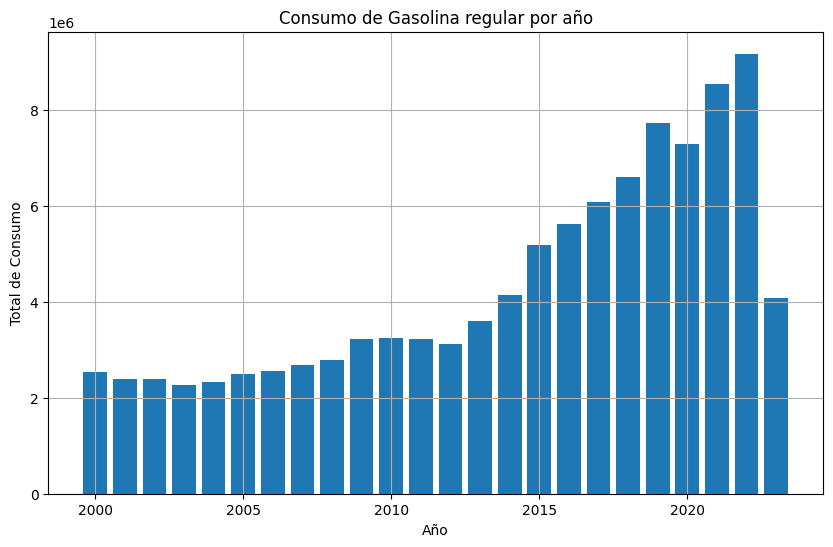

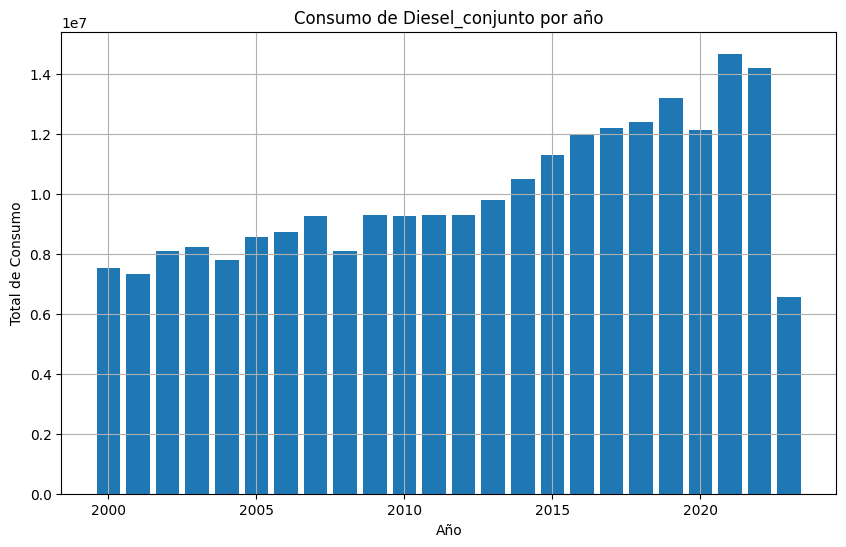

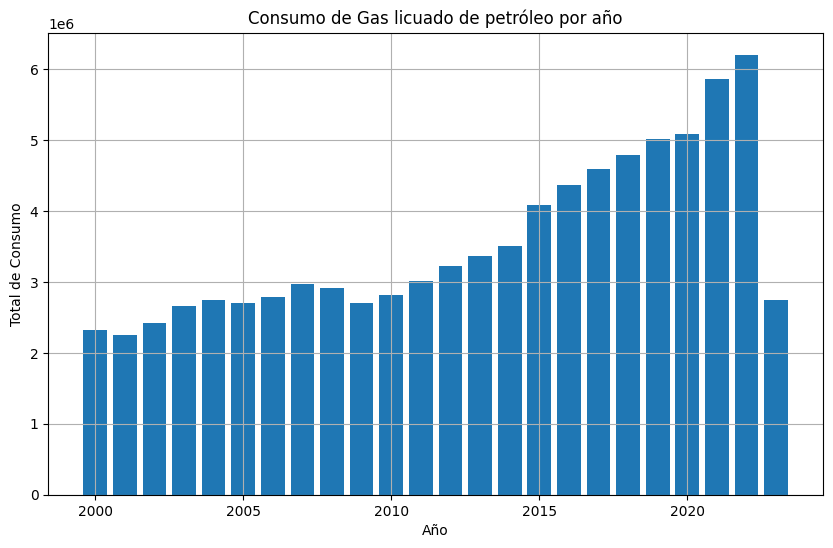

In [19]:
consumo['Year'] = consumo['Fecha'].dt.year
yearly_consumption = consumo.groupby('Year')[['Gasolina superior', 'Gasolina regular', 'Diesel_conjunto', 'Gas licuado de petróleo']].sum()
for gasoline_type in ['Gasolina superior', 'Gasolina regular', 'Diesel_conjunto', 'Gas licuado de petróleo']:
    plt.figure(figsize=(10, 6))
    plt.bar(yearly_consumption.index, yearly_consumption[gasoline_type])
    plt.title('Consumo de {} por año'.format(gasoline_type))
    plt.xlabel('Año')
    plt.ylabel('Total de Consumo')
    plt.grid(True)
    plt.show()


2. Van a trabajar con 3 de las siguientes series, al menos 1 de ellas debe estimar precios:
    a. Consumo mensual de gasolina super, gasolina regular, diésel y gas licuado
    b. Importación mensual de gasolina super gasolina regular, diésel y gas licuado
    c. Precios en ciudad capital de gasolina super, gasolina regular, diésel y gas licuado

In [20]:
print(consumo_numerics.columns)

Index(['Gasolina regular', 'Gasolina superior', 'Diesel_conjunto',
       'Gas licuado de petróleo'],
      dtype='object')


In [21]:
# plt.plot(consumo["Fecha"], consumo_numerics['Gasolina regular'], label=column)
# plt.gca().set(title='Consumo de Combustible', ylabel='Consumo', xlabel='Año')
# plt.legend()
# plt.show()

In [22]:
# mediaMovil = consumo_numerics['Gasolina regular'].rolling(window=12).mean()
# deMovil = consumo_numerics['Gasolina regular'].rolling(window=12).std()
# # Se grafican los resultados.
# original = plt.plot( consumo['Fecha'], consumo_numerics['Gasolina regular'], color="blue", label="Original")
# media = plt.plot(consumo['Fecha'], mediaMovil, color='red', label = 'Media Movil')
# ds = plt.plot(consumo['Fecha'], deMovil, color='black', label = 'Desviación Estándar Móvil')
# plt.legend(loc = 'best')
# plt.title('Media y desviación estándar móvil')
# plt.show(block=False)

In [23]:
# plt.plot(consumo["Fecha"], consumo_numerics['Gasolina superior'], label=column)
# plt.gca().set(title='Consumo de Combustible', ylabel='Consumo', xlabel='Año')
# plt.legend()
# plt.show()

In [24]:
# mediaMovil = consumo_numerics['Gasolina superior'].rolling(window=12).mean()
# deMovil = consumo_numerics['Gasolina superior'].rolling(window=12).std()
# # Se grafican los resultados.
# original = plt.plot( consumo['Fecha'], consumo_numerics['Gasolina superior'], color="blue", label="Original")
# media = plt.plot(consumo['Fecha'], mediaMovil, color='red', label = 'Media Movil')
# ds = plt.plot(consumo['Fecha'], deMovil, color='black', label = 'Desviación Estándar Móvil')
# plt.legend(loc = 'best')
# plt.title('Media y desviación estándar móvil')
# plt.show(block=False)

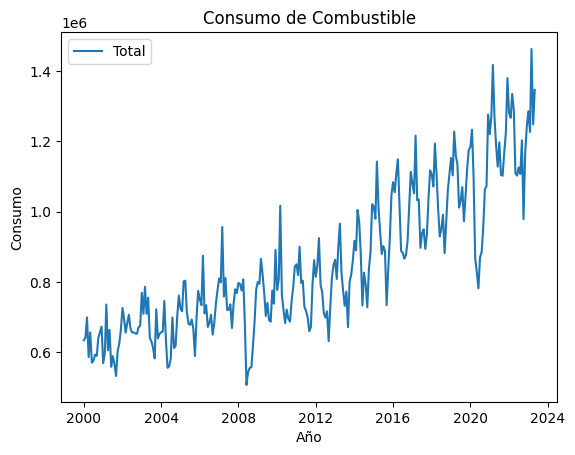

In [25]:
plt.plot(consumo["Fecha"], consumo_numerics['Diesel_conjunto'], label=column)
plt.gca().set(title='Consumo de Combustible', ylabel='Consumo', xlabel='Año')
plt.legend()
plt.show()

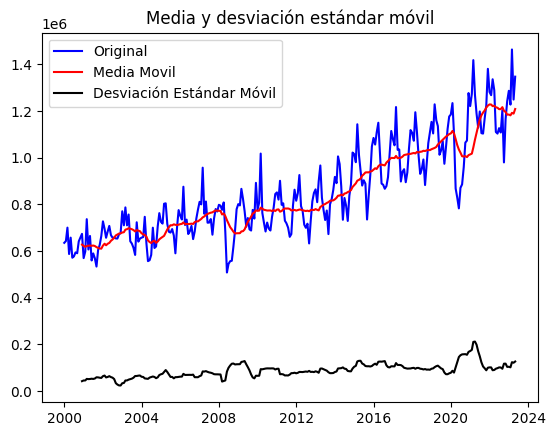

In [26]:
mediaMovil = consumo_numerics['Diesel_conjunto'].rolling(window=12).mean()
deMovil = consumo_numerics['Diesel_conjunto'].rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot( consumo['Fecha'], consumo_numerics['Diesel_conjunto'], color="blue", label="Original")
media = plt.plot(consumo['Fecha'], mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(consumo['Fecha'], deMovil, color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

In [27]:
# plt.plot(consumo["Fecha"], consumo_numerics['Gas licuado de petróleo'], label=column)
# plt.gca().set(title='Consumo de Combustible', ylabel='Consumo', xlabel='Año')
# plt.legend()
# plt.show()

In [28]:
# mediaMovil = consumo_numerics['Gas licuado de petróleo'].rolling(window=12).mean()
# deMovil = consumo_numerics['Gas licuado de petróleo'].rolling(window=12).std()
# # Se grafican los resultados.
# original = plt.plot( consumo['Fecha'], consumo_numerics['Gas licuado de petróleo'], color="blue", label="Original")
# media = plt.plot(consumo['Fecha'], mediaMovil, color='red', label = 'Media Movil')
# ds = plt.plot(consumo['Fecha'], deMovil, color='black', label = 'Desviación Estándar Móvil')
# plt.legend(loc = 'best')
# plt.title('Media y desviación estándar móvil')
# plt.show(block=False)

### Descomponiendo las series

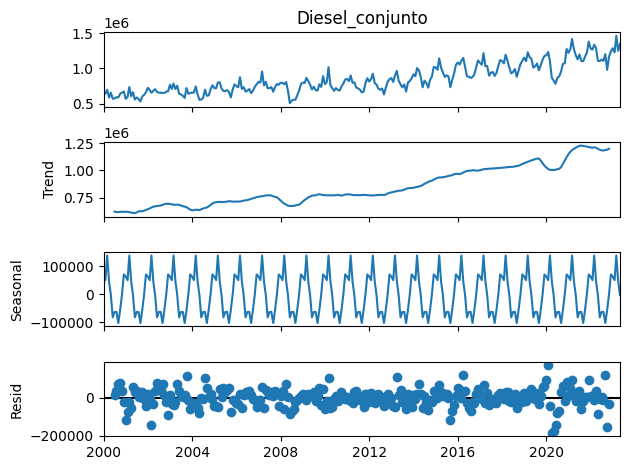

In [37]:
descomposicion = seasonal_decompose(consumo['Diesel_conjunto'])
descomposicion.plot()
plt.show()